In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans , DBSCAN
from sklearn.preprocessing import StandardScaler



import edilmesi gereken kütüphaneler 

In [31]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
  
dataset=pd.concat([X, y], axis=1)


veri setini adresten çektik . future ve targetsleri birleştirip bir tane datafram oluşturduk

In [32]:
print(dataset.columns)
print(dataset.info())
print(dataset.describe())


Index(['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3', 'Diagnosis'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non

dataset hakkında bilgileri , column adlarını ve describesini aldık

In [33]:
print(dataset.isnull().sum())

radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
Diagnosis             0
dtype: int64


null değerler var mı onun kontrolülünü yaptım

In [34]:
dataset=dataset.drop(columns=["Diagnosis"])
print(dataset.head())

   radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0    17.99     10.38      122.80  1001.0      0.11840       0.27760   
1    20.57     17.77      132.90  1326.0      0.08474       0.07864   
2    19.69     21.25      130.00  1203.0      0.10960       0.15990   
3    11.42     20.38       77.58   386.1      0.14250       0.28390   
4    20.29     14.34      135.10  1297.0      0.10030       0.13280   

   concavity1  concave_points1  symmetry1  fractal_dimension1  ...  radius3  \
0      0.3001          0.14710     0.2419             0.07871  ...    25.38   
1      0.0869          0.07017     0.1812             0.05667  ...    24.99   
2      0.1974          0.12790     0.2069             0.05999  ...    23.57   
3      0.2414          0.10520     0.2597             0.09744  ...    14.91   
4      0.1980          0.10430     0.1809             0.05883  ...    22.54   

   texture3  perimeter3   area3  smoothness3  compactness3  concavity3  \
0     17.33      184.60 

kümelemeye engel olan sınıflar çıkardım ve datasetin head kısmını yazdırdım 

In [35]:
string_cols = dataset.select_dtypes(include=['object']).columns
print(string_cols)


Index([], dtype='object')


datasetde başka string ifade var mı onun kontrolü yapıdım

In [36]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)# veri ölçeklendirmesi yaptık

veriler ölçeklendirildi yani bir birine benzetildi değerleri yakınlaştırıldı bu sayede model eğitimi daha kolay olur

<Figure size 2800x2600 with 0 Axes>

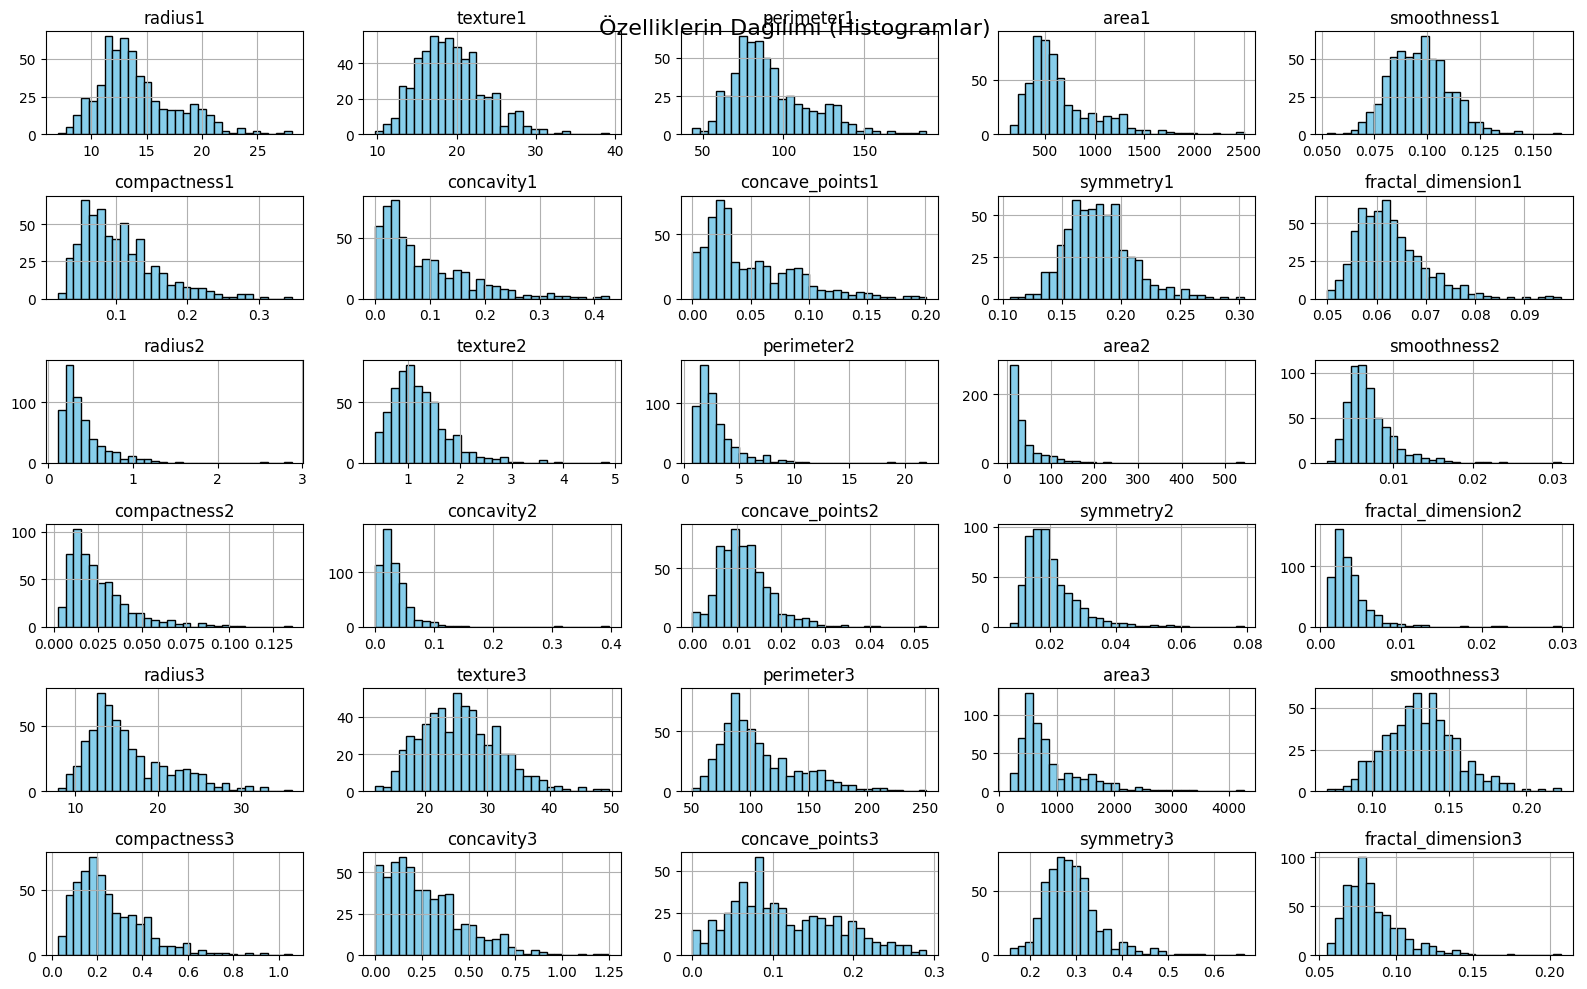

In [37]:
scaled_df = pd.DataFrame(X, columns=X.columns)
# Tüm özelliklerin dağılımını çiz
plt.figure(figsize=(28, 26))
scaled_df.hist(bins=30, figsize=(16,10), color='skyblue',edgecolor='black')
plt.tight_layout()
plt.suptitle("Özelliklerin Dağılımı (Histogramlar)", fontsize=16)
plt.show()


dataset deki özelliklerin dağılımını göterir

In [38]:
k=range(1,11)
inertia=[]
for i in k:
    kmeans=KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

optimum k değerini bulmaya yarar

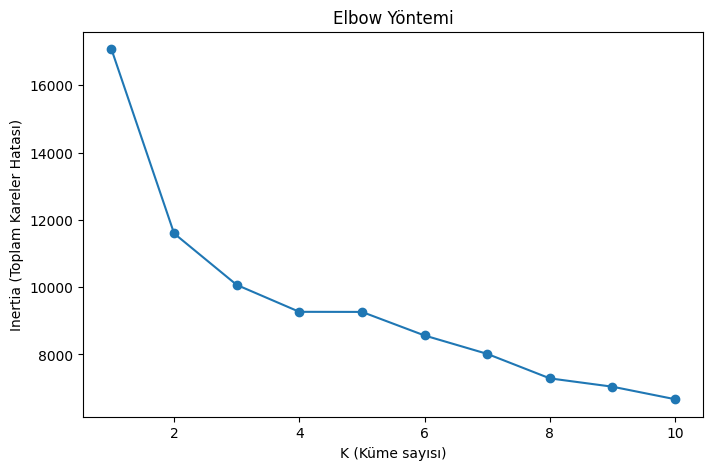

In [39]:
plt.figure(figsize=(8,5))
plt.plot(k, inertia, marker='o')
plt.xlabel('K (Küme sayısı)')
plt.ylabel('Inertia (Toplam Kareler Hatası)')
plt.title('Elbow Yöntemi')
plt.show()

bulunan k değerlerinin grafiğini çizdik bu grafikde sert ani değişim optimum k değeridir ve 1 yakın olması daha iyi

In [40]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X_scaled)
score = silhouette_score(X_scaled, labels)
print(f"Silhouette Skoru (K=2): {score:.3f}")

Silhouette Skoru (K=2): 0.345


k=2 alarak model eğititim ve silhouette skorunu yazdırdım

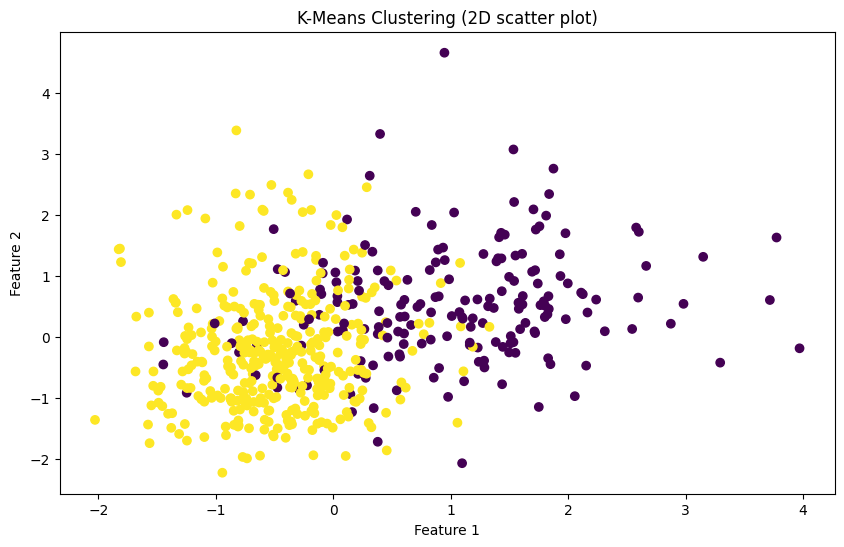

In [41]:
plt.figure(figsize=(10,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=labels, cmap='viridis')
plt.title('K-Means Clustering (2D scatter plot)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


her veri setini renklerine göre kümeleme yapar n_clusters =2 yaptığımız için 2 renk olarak kümelem yaptı

In [42]:
#DBSCAN algorithm
dbscan=DBSCAN(eps=1.8, min_samples=5)
predict=dbscan.fit_predict(X_scaled)

eps=1.8 , komşuluk yarıçapı yani bir veri diğer veri arasındaki uzaklık bu kadarsa komşu olurlar
min_samples=5 en az bir küme olabilmek için 5 tane veri olması gerekiyor 
ve burda modeli eğittik

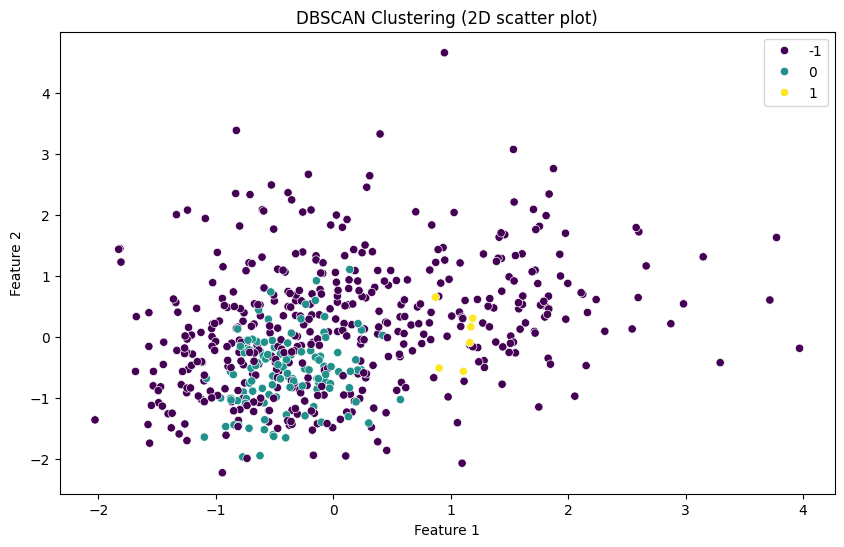

In [43]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=predict, palette='viridis')
plt.title('DBSCAN Clustering (2D scatter plot)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

veriyi nasıl kümelere ayırdığını gösterir
-1 değerler verideki gürültü yapan değerlerdir

In [44]:

print(y.head())
print(type(y))

if isinstance(y, pd.DataFrame) and "Diagnosis" in y.columns:#datafram de diagnosis columu var mı onu kontrol eder
    true_labels_text=y["Diagnosis"]

if true_labels_text is not None:#etiket değerlerini numerik değerlere dönüştürdük
    true_labels_numeric=true_labels_text.map({'M': 1, 'B': 0})


print("\nMetin etiketleri ('M', 'B'):")
print(true_labels_text.head().to_list()) 
print("\nSayısal etiketlere (1, 0) dönüştürülmüş hali:")
print(true_labels_numeric[:5]) 
print(f"\nToplam {len(true_labels_numeric)} adet etiket başarıyla dönüştürüldü.")

  Diagnosis
0         M
1         M
2         M
3         M
4         M
<class 'pandas.core.frame.DataFrame'>

Metin etiketleri ('M', 'B'):
['M', 'M', 'M', 'M', 'M']

Sayısal etiketlere (1, 0) dönüştürülmüş hali:
0    1
1    1
2    1
3    1
4    1
Name: Diagnosis, dtype: int64

Toplam 569 adet etiket başarıyla dönüştürüldü.


Bu kod, y adlı bir pandas DataFrame'i içindeki "Diagnosis" sütununu (hedef değişkeni) alır.

Bu sütundaki 'M' ve 'B' gibi metin (kategorik) etiketleri,  modellerinin anlayabilmesi için sırasıyla 1 ve 0 gibi sayısal değerlere dönüştürür.

Kısacası, metin etiketlerini sayısal etiketlere çevirir (Encoding yapar) ve işlemin başarılı olduğunu göstermek için ilk 5 örneği ekrana basar.

In [45]:
ari_kmeans = adjusted_rand_score(true_labels_numeric.values, labels)
print(f"Adjusted Rand Index (KMeans vs true labels): {ari_kmeans:.4f}")

Adjusted Rand Index (KMeans vs true labels): 0.6765


Bu kod, KMeans algoritmasının bulduğu kümelerin (labels), verinin gerçek etiketleriyle (true_labels_numeric) ne kadar uyuştuğunu ölçer.

In [46]:
nmi_kmeans=normalized_mutual_info_score(true_labels_numeric.values,labels)
print(f"Normalized Mutual Information (NMI): {nmi_kmeans:.3f}")

Normalized Mutual Information (NMI): 0.562


Kısaca, modelin tahmin ettiği kümelerin (labels) ile eldeki gerçek etiketlerin (true_labels_numeric) birbiriyle ne kadar örtüştüğünü (ne kadar "bilgi paylaştığını") ölçer.

1'e yakınsa: Kümeler ve gerçek etiketler mükemmel uyuşuyor.

0'a yakınsa: Kümeler ile gerçek etiketler arasında anlamlı bir ilişki yok (rastgele).

In [47]:
conf_matrx_kmeans=confusion_matrix(true_labels_numeric,labels)
print(f"\nConfusion Matrix (Karmaşıklık Matrisi):\n", conf_matrx_kmeans)


Confusion Matrix (Karmaşıklık Matrisi):
 [[ 13 344]
 [175  37]]


Bu matris, kümeleme modelinizin performansını görmek için kullanılır. Modelin tahmin ettiği etiketleri (labels) ile gerçek etiketleri (true_labels_numeric) karşılaştırır ve sonuçları bir tablo halinde özetler:

Hangi etiketleri doğru tahmin etti?

Hangi etiketleri yanlış tahmin etti (ve hangisiyle karıştırdı)?

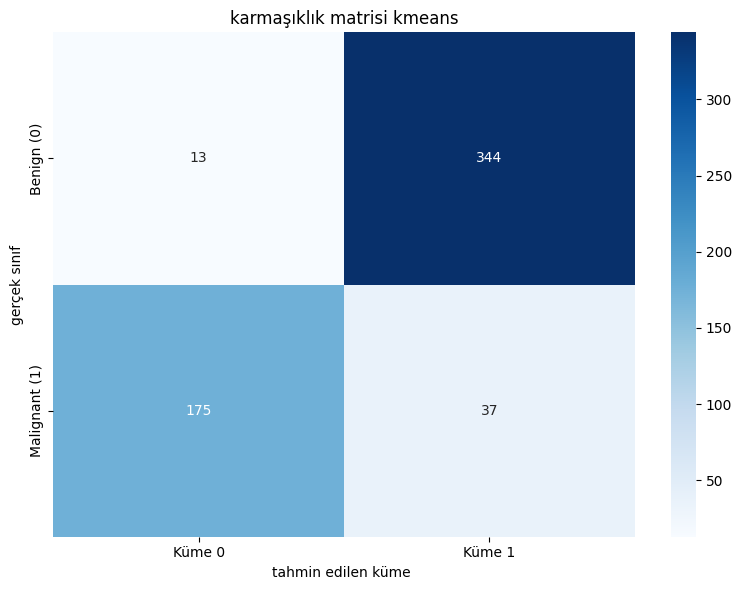

In [48]:
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrx_kmeans, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Küme 0', 'Küme 1'],
                yticklabels=['Benign (0)', 'Malignant (1)'])
plt.xlabel("tahmin edilen küme ")
plt.ylabel("gerçek sınıf")
plt.title( "karmaşıklık matrisi kmeans")
plt.tight_layout()
plt.show()

Bu kod, önceki adımda hesapladığınız conf_matrx_kmeans (karmaşıklık matrisi) verisini görsel bir ısı haritası (heatmap) olarak çizer.

In [49]:
noise_count = np.sum(predict == -1)
print(f"DBSCAN tarafından gürültü olarak etiketlenen nokta sayısı: {noise_count}")

# İndeksleri belirle (gürültü olmayan noktalar)
non_noise_indices = np.where(predict != -1)[0]
unique_dbscan_labels = np.unique(predict[non_noise_indices]) if non_noise_indices.size > 0 else np.array([])

# Gerçek ve tahmin etiketlerini filtrele
true_labels_filtered = true_labels_numeric.iloc[non_noise_indices] if non_noise_indices.size > 0 else pd.Series(dtype=int)
dbscan_labels_filtered = predict[non_noise_indices]


DBSCAN tarafından gürültü olarak etiketlenen nokta sayısı: 447


DBSCAN'in "gürültü" (outlier) olarak etiketlediği (-1 olan) noktaları sayar ve ekrana basar.

Hesaplamaları (ARI, NMI gibi) bozmamak için bu "gürültü" noktalarını veri setinden filtreler (ayıklar).

Sadece "gürültü olmayan" (bir kümeye ait olan) noktaların gerçek etiketlerini (true_labels_filtered) ve DBSCAN tahminlerini (dbscan_labels_filtered) ayrı listelerde toplar.

In [50]:

if len(true_labels_filtered) > 0:
    ari_dbscan = adjusted_rand_score(true_labels_filtered.values, dbscan_labels_filtered)
    print(f"Adjusted Rand Index (ARI) (Gürültüsüz): {ari_dbscan:.3f}")

    nmi_dbscan = normalized_mutual_info_score(true_labels_filtered.values, dbscan_labels_filtered)
    print(f"normalized score {nmi_dbscan:.3f}")

    conf_matrx_dbscan = confusion_matrix(true_labels_filtered, dbscan_labels_filtered)
    print(f"conf matrix i \n {conf_matrx_dbscan}")

Adjusted Rand Index (ARI) (Gürültüsüz): 0.910
normalized score 0.830
conf matrix i 
 [[115   0]
 [  1   6]]


Kısaca, "gürültü" olarak ayrılan noktaları dikkate almaz ve sadece bir kümeye atadığı noktaların (dbscan_labels_filtered) gerçek etiketlerle (true_labels_filtered) ne kadar uyuştuğunu şu metriklerle ölçer:

Adjusted Rand Index (ARI): Kümeleme ile gerçek etiketler arasındaki benzerliği puanlar.

Normalized Mutual Information (NMI): Kümelerin gerçek etiketler hakkında ne kadar bilgi taşıdığını ölçer.

Confusion Matrix: Hangi gerçek etiketlerin hangi kümelere atandığını gösteren bir tablo oluşturur.

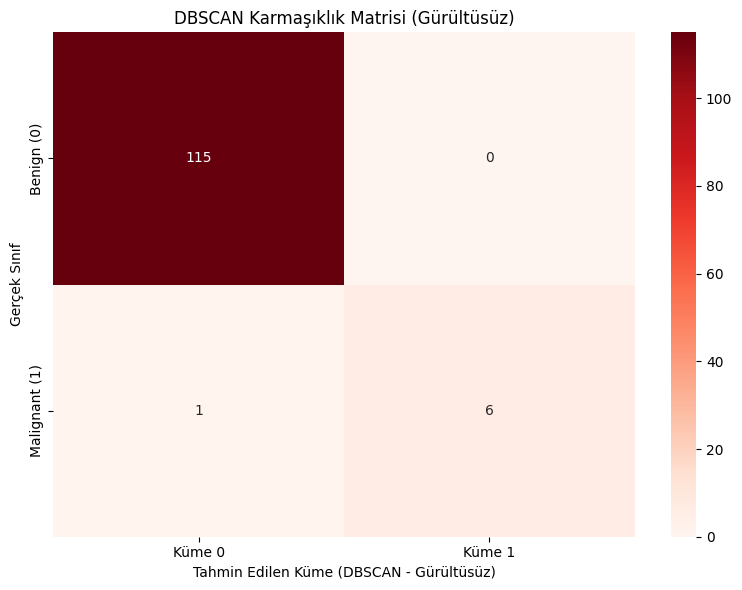

In [51]:
plt.figure(figsize=(8,6))
    
sns.heatmap(conf_matrx_dbscan, annot=True, cmap="Reds", fmt="d",
                xticklabels=[f'Küme {l}' for l in unique_dbscan_labels],
                yticklabels=['Benign (0)', 'Malignant (1)'])
plt.xlabel('Tahmin Edilen Küme (DBSCAN - Gürültüsüz)')
plt.ylabel('Gerçek Sınıf')
plt.title('DBSCAN Karmaşıklık Matrisi (Gürültüsüz)')
plt.tight_layout()
plt.show()


Bu kod, DBSCAN modelinin (gürültü ayıklandıktan sonraki) karmaşıklık matrisini (conf_matrx_dbscan) görsel bir ısı haritası (heatmap) olarak çizer.

Kısaca, modelin hangi gerçek sınıfları (Benign, Malignant) hangi kümelere atadığını renkli bir tablo halinde gösterir ve bu sayede modelin performansını kolayca yorumlamanızı sağlar.